In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jleland/Coding/Projects/flopter')
import lputils as lp

In [2]:
x = np.linspace(0, 30, 100)

# Flush probe measurements
L_small = 3e-3  # m
a_small = 2e-3  # m
b_small = 3e-3  # m
g_small = 2e-3  # m
theta_f_small = np.radians(72)

L_large = 5e-3      # m
a_large = 4.5e-3    # m
b_large = 6e-3      # m
g_large = 1e-3      # m
theta_f_large = np.radians(73.3)

L_reg = 5e-3        # m
a_reg = 2e-3        # m
b_reg = 3.34e-3     # m
g_reg = 1e-3        # m
theta_f_reg = np.radians(75)

d_perp = 3e-4  # m
theta_p = np.radians(10)
theta_perp = np.radians(x)

areas = [[],[],[]]
ds = [[],[],[]]
h_colls = [[],[],[]]
for alpha in theta_perp:
    A_coll_s = lp.calc_probe_collection_area(a_small, b_small, L_small, g_small, d_perp, alpha, theta_p, theta_f_small, print_fl=False)
    A_coll_l = lp.calc_probe_collection_area(a_large, b_large, L_large, g_large, d_perp, alpha, theta_p, theta_f_large, print_fl=False)
    A_coll_r = lp.calc_probe_collection_area(a_reg, b_reg, L_reg, g_reg, d_perp, alpha, theta_p, theta_f_reg,print_fl=False)
    d_s, h_coll_s = lp.calc_probe_exposed_lengths(g_small, d_perp, alpha, theta_p)
    d_l, h_coll_l = lp.calc_probe_exposed_lengths(g_large, d_perp, alpha, theta_p)
    d_r, h_coll_r = lp.calc_probe_exposed_lengths(g_small, d_perp, alpha, theta_p)
    areas[0].append(A_coll_r)
    areas[1].append(A_coll_s)
    areas[2].append(A_coll_l)
    ds[0].append(d_r)
    ds[1].append(d_s)
    ds[2].append(d_l)
    h_colls[0].append(h_coll_r)
    h_colls[1].append(h_coll_s)
    h_colls[2].append(h_coll_l)
    
areas = np.array(areas)
ds = np.array(ds)
h_colls = np.array(h_colls)
print(np.shape(areas))

(3, 100)


Text(0,0.5,'$h_{coll}$ / mm')

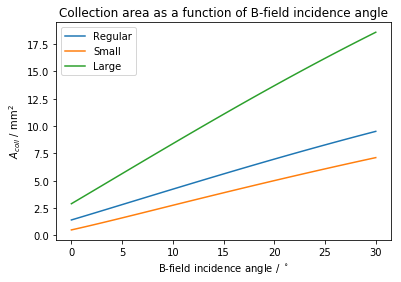

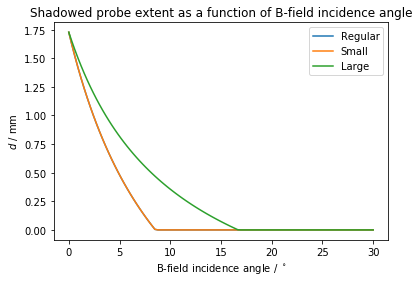

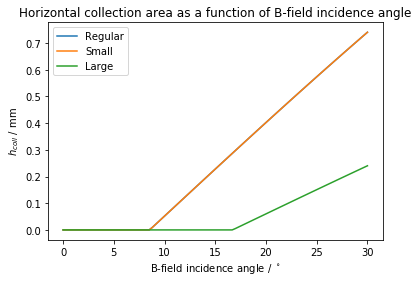

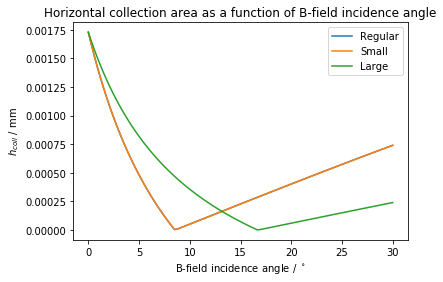

In [6]:
plt.figure()
plt.plot(x, areas[0] * 1e6, label='Regular')
plt.plot(x, areas[1] * 1e6, label='Small')
plt.plot(x, areas[2] * 1e6, label='Large')
plt.legend()
plt.title('Collection area as a function of B-field incidence angle')
plt.xlabel(r'B-field incidence angle / $^\circ$')
plt.ylabel(r'$A_{coll}$ / mm$^{2}$')

plt.figure()
plt.plot(x, ds[0] * 1e3, label='Regular')
plt.plot(x, ds[1] * 1e3, label='Small')
plt.plot(x, ds[2] * 1e3, label='Large')
plt.legend()
plt.title('Shadowed probe extent as a function of B-field incidence angle')
plt.xlabel(r'B-field incidence angle / $^\circ$')
plt.ylabel(r'$d$ / mm')

plt.figure()
plt.plot(x, h_colls[0] * 1e3, label='Regular')
plt.plot(x, h_colls[1] * 1e3, label='Small')
plt.plot(x, h_colls[2] * 1e3, label='Large')
plt.legend()
plt.title('Horizontal collection area as a function of B-field incidence angle')
plt.xlabel(r'B-field incidence angle / $^\circ$')
plt.ylabel(r'$h_{coll}$ / mm')

plt.figure()
plt.plot(x, ds[0] + h_colls[0], label='Regular')
plt.plot(x, ds[1] + h_colls[1], label='Small')
plt.plot(x, ds[2] + h_colls[2], label='Large')
plt.legend()
plt.title('Horizontal collection area as a function of B-field incidence angle')
plt.xlabel(r'B-field incidence angle / $^\circ$')
plt.ylabel(r'$h_{coll}$ / mm')